El conjunto de datos ya forma parte de la biblioteca Scikit-Learn, sólo tenemos que importarlo y cargarlo como un marco de datos:

In [765]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos los datos y creamos un data frame
iris = datasets.load_iris()
X =iris.data[:, :2] 
y =iris.target
iris = sns.load_dataset("iris")

df=pd.DataFrame(iris)

In [766]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [768]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [769]:
print("Distribución de las especies de Iris")
df.groupby("species").size()

Distribución de las especies de Iris


species
setosa        50
versicolor    50
virginica     50
dtype: int64

El conjunto de datos consta de cinco atributos:

Se encuentran cincuenta características del ancho y largo del sépalo y pétalo de cada una de las especies que pueden ser "Iris_setosa", "Iris_versicolor" e "Iris_virginica".





                            Visualización de los datos

La gráfica a construir será del tipo dispersión, y vamos a graficar primero los datos correspondientes al sépalo. Colocamos en el eje X los datos de longitud y en el eje Y los datos del ancho, a su vez para cada una de las especies de Iris le colocamos un color. Para los datos del Iris setosa los colocamos de color azul, para el Iris Versicolor será de color verde y para el Iris Virginica colocamos los datos de color rojo

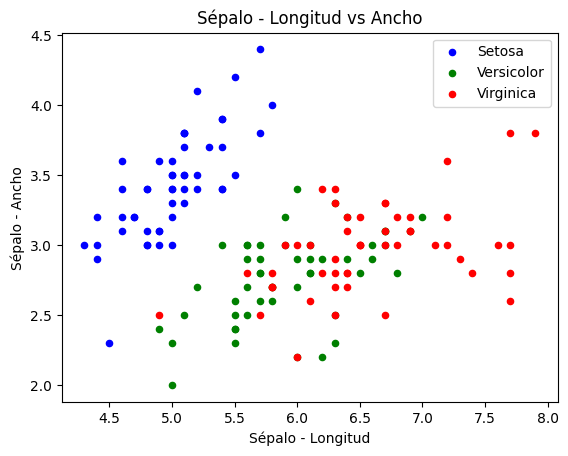

In [770]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='blue', label='Setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='green', label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', x='sepal_length', y='sepal_width', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

En la gráfica de dispersión los datoa estas distribuidos casi de manera uniforma, en general a los correspondientes largos y anchos del sépalo de Iris setosa, mientras que para Iris versicolor y virginica estan tienen cualidades similares que a simple vista se pueden confundir.






Hacemos exactamente los mismo pero para los datos de largo y ancho del pétalo

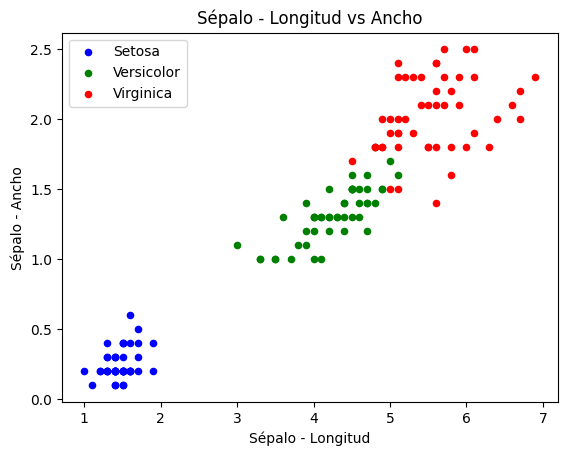

In [771]:
#Grafico Sepal - Longitud vs Ancho
fig = iris[iris.species == 'setosa'].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Setosa')
iris[iris.species == 'versicolor'].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Versicolor', ax=fig)
iris[iris.species == 'virginica'].plot(kind='scatter', x='petal_length', y='petal_width', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sépalo - Longitud')
fig.set_ylabel('Sépalo - Ancho')
fig.set_title('Sépalo - Longitud vs Ancho')
plt.show()

En este gráfico si podemos lograr ver unos datos más uniformes por cada tipo de Iris.

In [772]:

#Eliminamos la columna de species "tipo de Iris" ya que no es relevante para el modelo
df=df.drop("species", axis=1)

                            Modelo de Vecinos más cercanos

In [773]:
# Vamos a crear los bins de datos para transformar nuestros valores continuos en categorías:
df["sepal_widthCat"] = pd.qcut(df["sepal_width"], 3, retbins=False, labels=[1, 2, 3])
df["sepal_widthCat"]


0      3
1      2
2      2
3      2
4      3
      ..
145    2
146    1
147    2
148    3
149    2
Name: sepal_widthCat, Length: 150, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sepal_length    150 non-null    float64 
 1   sepal_width     150 non-null    float64 
 2   petal_length    150 non-null    float64 
 3   petal_width     150 non-null    float64 
 4   sepal_widthCat  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


              Dividir los datos en conjuntos de entrenamiento y de prueba

Utilizaremos de nuevo el valor estándar de Scikit-Learn de 75% de datos de entrenamiento y 25% de datos de prueba. Esto significa que tendremos el mismo número de registros de entrenamiento y de prueba que en la regresión anterior.

In [775]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 112 datos para entrenamiento y 38 datos para prueba


Dado que estamos tratando con el mismo conjunto de datos sin procesar y sus diferentes unidades de medida, realizaremos de nuevo el escalado de características.

In [776]:
# Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

                   Entrenamiento y predicción para la clasificación

Después de agrupar, dividir y escalar los datos, podemos aplicarles un clasificador. Para la predicción, utilizaremos de nuevo 5 vecinos como línea de base. También puede instanciar la clase KNeighbors_ sin ningún argumento y automáticamente utilizará 5 vecinos. Aquí, en lugar de importar el KNeighborsRegressor, importaremos el KNeighborsClassifier, clase

In [777]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [778]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

#### Evaluando KNN para la clasificación


Para evaluar el clasificador KNN, también podemos utilizar el método de puntuación, pero ejecuta una métrica diferente ya que estamos puntuando un clasificador y no un regresor. La métrica básica para la clasificación es la precisión, que describe cuántas predicciones acertó nuestro clasificador. El valor de precisión más bajo es 0 y el más alto es 1. Normalmente multiplicamos ese valor por 100 para obtener un porcentaje.

$$accuracy=\frac{number of correct predictions
}{total number of predictions
}

In [779]:
acc =  classifier.score(X_test, y_test)
print(acc) # 78.94%

0.7894736842105263


Podemos evidenciar que nuestro clasificador acertó en un 78.94%del total de las clases.

**F1 Score**: Es la media equilibrada o armónica de precisión y recall. El valor más bajo es 0 y el más alto es 1. Cuando la puntuación f1 es igual a 1, significa que todas las clases se predijeron correctamente; se trata de una puntuación muy difícil de obtener con datos reales (casi siempre hay excepciones).
$$f1-score=\frac{precisioin * recall}{precisioin + recall}



Para obtener las métricas, ejecute el siguiente fragmento:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.64      0.64      0.64        11
           2       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38


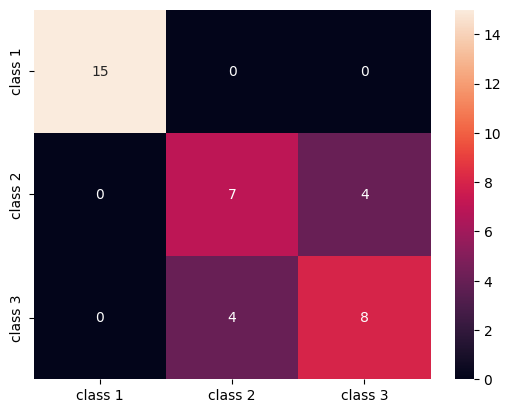

In [780]:
from sklearn.metrics import classification_report, confusion_matrix

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

Conclusiones:    

None 0.7466666666666667
0.2 0.7466666666666667


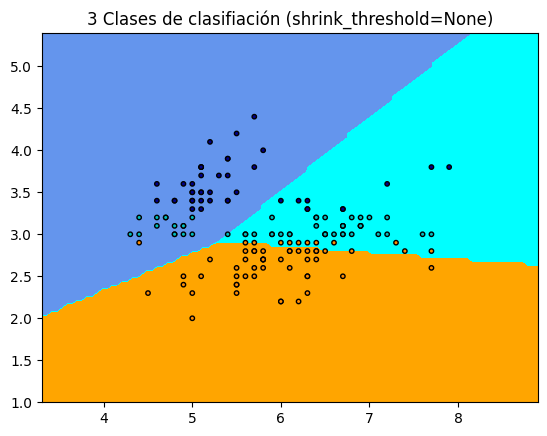

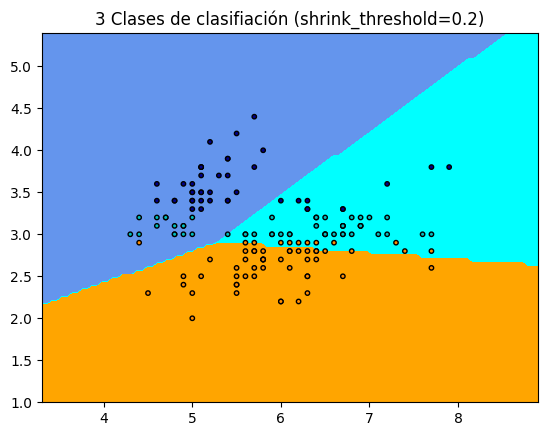

In [781]:

import numpy as np
from matplotlib.colors import ListedColormap


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

# Suponiendo que X es un DataFrame de pandas
X_2d = X
y = df['sepal_widthCat']


# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3 Clases de clasifiación (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

Conclusiones:

#### Finding the Best K for KNN Classification

In [782]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

El siguiente paso consiste en representar gráficamente los valores de f1_score frente a los valores de K. La diferencia con la regresión es que en lugar de elegir el valor K que minimiza el error, esta vez elegiremos el valor que maximiza la puntuación f1.

Ejecute el siguiente script para crear el gráfico:

(0.675, 0.85)

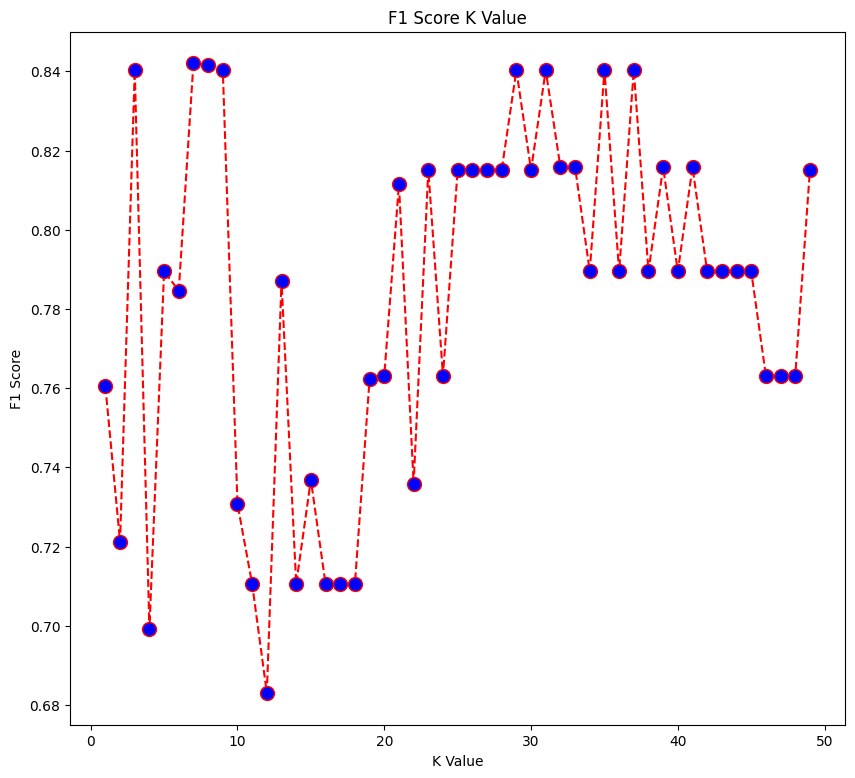

In [783]:


plt.figure(figsize=(10, 9))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.ylim(0.675, 0.85)

Podemos observar que el valor K que maximiza la puntuación f1 es de de 6-7.Volvemos a entrenar el modelo con ese número de K.

In [784]:
classifier15 = KNeighborsClassifier(n_neighbors=7)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      0.73      0.73        11
           2       0.75      0.75      0.75        12

    accuracy                           0.84        38
   macro avg       0.83      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38



Conclusiones: Tenemos mejores porcentajes en nuestras métricas, aumentamos de un 79% de precisión a un 84%, nuestro f1 de la clase 1 y 2 aumentaron tambien del 64% y 67% a un 77% y 79% respectivamente con un K=7

                Implementando KNN para detección de datos atipicos
                       en nuestra base de datos Iris


In [785]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 7)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

Ahora tenemos 5 distancias para cada punto de datos: la distancia entre él y sus 7 vecinos, y un índice que los identifica. Echemos un vistazo a los tres primeros resultados y a la forma del array para visualizarlo mejor.

Para ver la forma de las tres primeras distancias, ejecuta:

In [786]:
distances[:3], distances.shape

(array([[0.        , 0.12263051, 0.22979835, 0.22979835, 0.26047173,
         0.26047173, 0.26047173],
        [0.        , 0.4337643 , 0.52094347, 0.52094347, 0.70021695,
         0.70021695, 0.77083333],
        [0.        , 0.        , 0.        , 0.22979835, 0.22979835,
         0.24526103, 0.24526103]]),
 (112, 7))

Observe que hay 3 filas con 5 distancias cada una. También podemos mirar y los índices de los vecinos:

In [787]:
indexes[:3], indexes[:3].shape


(array([[  0,  94,  50,  19,  15,  63,  90],
        [  1,  33,  40,   5,  20,  76, 109],
        [ 35,   2,  17,  48, 110,  54,  26]], dtype=int64),
 (3, 7))

En la salida anterior, podemos ver los índices de cada uno de los 5 vecinos. Ahora, podemos seguir calculando la media de las 5 distancias y trazar un gráfico que cuente cada fila en el eje X y muestre cada distancia media en el eje Y:

Text(0, 0.5, 'Mean Distances')

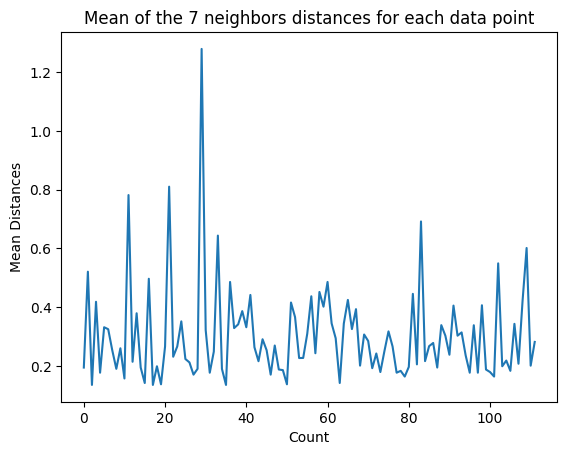

In [788]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 7 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

In [789]:
media_distancias=pd.Series(dist_means)
media=media_distancias.mean()
print(media)

0.3013738196222184


Observe que hay una parte del gráfico en la que las distancias medias tienen valores uniformes. Ese punto del eje Y en el que las medias no son ni demasiado altas ni demasiado bajas es exactamente el punto que necesitamos identificar para cortar los valores atípicos.

En este caso, es donde la distancia media es 0,3. Vamos a trazar de nuevo el gráfico con una línea de puntos horizontal para poder identificarlo:

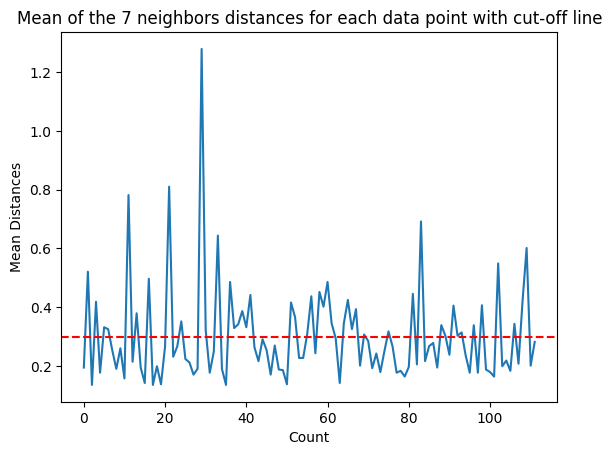

In [790]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 7 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.3, color = 'r', linestyle = '--')

Esta línea marca la distancia media por encima de la cual varían todos los valores. Esto significa que todos los puntos con una distancia media superior a 0.3 son nuestros valores atípicos. Podemos averiguar los índices de esos puntos utilizando np.where(). Este método dará como resultado Verdadero o Falso para cada índice con respecto a la condición de media superior a 3:

In [791]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.3)
outlier_index


(array([  1,   3,   5,   6,  11,  13,  16,  21,  24,  29,  30,  33,  36,
         37,  38,  39,  40,  41,  51,  52,  55,  56,  58,  59,  60,  61,
         64,  65,  66,  67,  69,  75,  81,  83,  88,  89,  91,  92,  93,
         96,  98, 102, 106, 108, 109], dtype=int64),)

Ahora tenemos nuestros índices de puntos atípicos. Vamos a localizarlos en el marco de datos:

In [794]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width,petal_length,petal_width,sepal_widthCat
1,4.9,3.0,1.4,0.2,2
3,4.6,3.1,1.5,0.2,2
5,5.4,3.9,1.7,0.4,3
6,4.6,3.4,1.4,0.3,3
11,4.8,3.4,1.6,0.2,3
13,4.3,3.0,1.1,0.1,2
16,5.4,3.9,1.3,0.4,3
21,5.1,3.7,1.5,0.4,3
24,4.8,3.4,1.9,0.2,3
29,4.7,3.2,1.6,0.2,2


Podemos ver que existen 45 datos que desvían la tendencia general de los datos en los datos de enrtrenamiento.